Let's use this Notebook to explore a FITS image and do some plotting using data! First, download the file from https://www.dropbox.com/s/fa442g1585cadn7/DES2203-5457_g.fits?dl=0 (it's huge!)

Much like the FITS tables we were working beforehand, we will use `astropy.io.fits` to play around with it.

In [2]:
import matplotlib.pyplot as pl
import numpy as np 
import astropy.io.fits as pf 
import astropy.table as tb 

In [1]:
a = tb.Table.read('DES2203-5457_g.fits')
a

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [2]:
data = pf.open('DES2203-5457_g.fits')

In [3]:
data

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f8a92c6f550>, <astropy.io.fits.hdu.compressed.CompImageHDU object at 0x7f8a92c4cd68>, <astropy.io.fits.hdu.compressed.CompImageHDU object at 0x7f8a92c54550>, <astropy.io.fits.hdu.compressed.CompImageHDU object at 0x7f8a92bdccc0>]

Most FITS images have a number of extensions, let's see what each one of them represents. We'll skip the `0`th extension, since it's just a global header.

In [7]:
for i in data[1:]:
    print(i.header['EXTNAME'])

SCI
MSK
WGT


The first one is the `SCI` extension, where the image data is. The second one, `MSK`, is the image mask (in case of defects in the image). Finally, `WGT` is a weight, important for computing noise. We'll just focus on the `SCI` extension. Let me also show you the header, which is full of details we don't need to care about!

In [8]:
sci = data[1]
print(sci, sci.header)

<astropy.io.fits.hdu.compressed.CompImageHDU object at 0x7f2254abaf28> SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                10000 / length of data axis 1                          NAXIS2  =                10000 / length of data axis 2                          PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              XTENSION= 'BINTABLE'           / binary table extension                         COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H EXTNAME = 'SCI     '                                                            EQUINOX =                2000. / Mean equinox    

This is not very useful, is it? We need to get the data out:

In [9]:
image = sci.data
image

array([[-2.232782  , -0.9315443 ,  2.257638  , ...,  0.00971517,
        -1.8121061 , -0.81877404],
       [-2.468819  ,  0.16526794,  0.36124498, ...,  0.585408  ,
         1.5631201 ,  0.87293637],
       [ 1.7885302 ,  1.2450846 ,  0.41756755, ...,  0.3171843 ,
        -0.75604   ,  2.688583  ],
       ...,
       [ 0.40889454, -0.9337956 , -1.8645318 , ...,  2.458594  ,
         0.8017863 ,  3.3504665 ],
       [-1.811319  ,  0.06191337, -0.77197033, ...,  3.4139342 ,
         0.13300836,  3.9528039 ],
       [-1.3849039 , -2.8026693 , -1.8960242 , ...,  2.589629  ,
         0.9830338 ,  6.7643614 ]], dtype=float32)

Oh, this is nothing but a numpy 2d array! Let's see its shape:

In [11]:
image.shape

(10000, 10000)

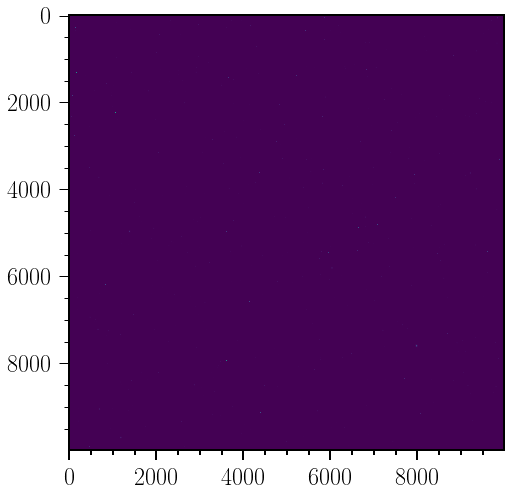

In [10]:
pl.imshow(image)
pl.show()

Not very useful, is it? We need to define our plotting scale in order to have a pretty visualization. Usually, for sky images, this is done using a thing called z-scale. Let's use Astropy for that...

In [11]:
from astropy.visualization import ZScaleInterval

In [12]:
vmin, vmax = ZScaleInterval().get_limits(image)

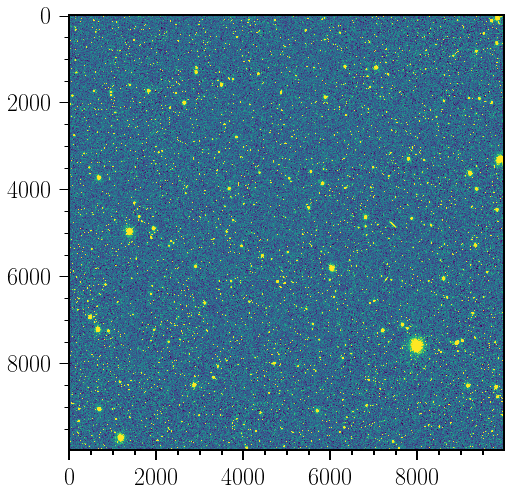

In [13]:
pl.imshow(image, vmin=vmin, vmax = vmax)
pl.show()

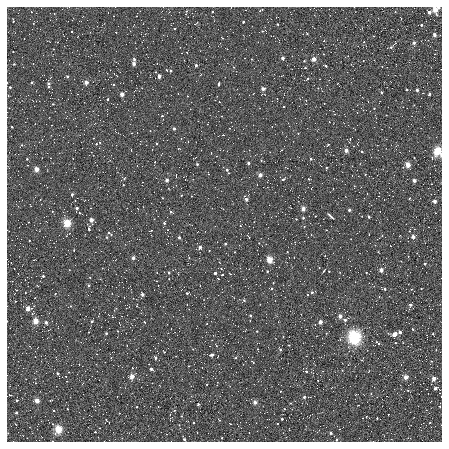

In [25]:
pl.imshow(image, vmin=vmin, vmax = vmax, cmap = 'gray', )

pl.axis('off')
pl.savefig('coadd.png')
pl.show()

In [21]:
image[7500:8000, 7500:8000].shape

(500, 500)

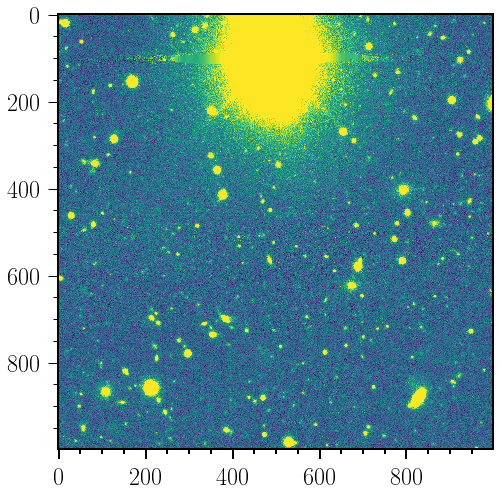

In [23]:
pl.imshow(image[7500:8500,7500:8500], vmin = vmin, vmax = vmax)
pl.show()

In [24]:
sci.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                10000 / length of data axis 1                          
NAXIS2  =                10000 / length of data axis 2                          
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EXTNAME = 'SCI     '                                                            
EQUINOX =                2000. / Mean equinox                                   
MJD-OBS =       56536.173481

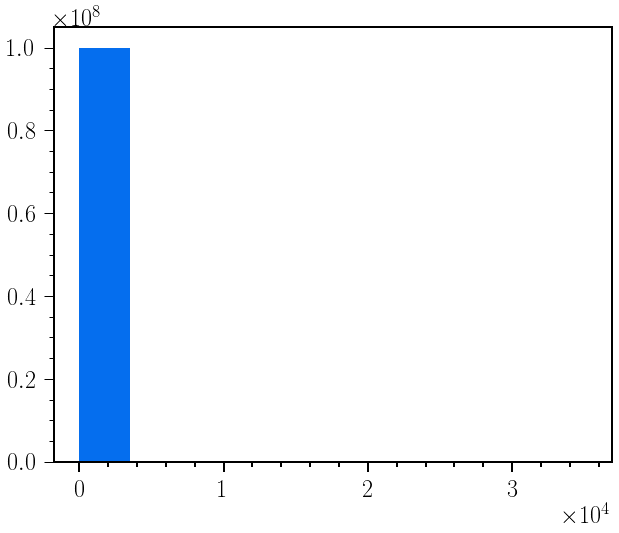

In [26]:
pl.hist(image.flatten())
pl.show()